Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 512)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14,747,650
Trainable params: 7,112,386
Non-trainable params: 7,635,264
___________________________________

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/64
5/5 [==============================] - 16s 3s/step - loss: 4.1386 - accuracy: 0.7250 - val_loss: 0.3001 - val_accuracy: 1.0000
Epoch 2/64
5/5 [==============================] - 14s 3s/step - loss: 0.1592 - accuracy: 0.9750 - val_loss: 0.1785 - val_accuracy: 1.0000
Epoch 3/64
5/5 [==============================] - 14s 3s/step - loss: 0.0961 - accuracy: 0.9750 - val_loss: 0.1693 - val_accuracy: 1.0000
Epoch 4/64
5/5 [==============================] - 15s 3s/step - loss: 1.8030e-05 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/64
5/5 [==============================] - 15s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.2301e-04 - val_accuracy: 1.0000
Epoch 6/64
5/5 [==============================] - 14s 3s/step - loss: 6.5135e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/64
5/5 [==============================] - 14s 3s/step - loss: 1.9131e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 8/64
5/5 [==

5/5 [==============================] - 15s 3s/step - loss: 7.2992e-08 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 59/64
5/5 [==============================] - 15s 3s/step - loss: 3.4410e-06 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 60/64
5/5 [==============================] - 15s 3s/step - loss: 7.7801e-07 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 61/64
5/5 [==============================] - 14s 3s/step - loss: 2.6272e-07 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 62/64
5/5 [==============================] - 15s 3s/step - loss: 2.1765e-06 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 63/64
5/5 [==============================] - 15s 3s/step - loss: 2.2710e-07 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 64/64
1/1 [==============================] - 2s 2s/step - loss: 0.0117 - accuracy: 1.0000
0.01166004128754139 1.0


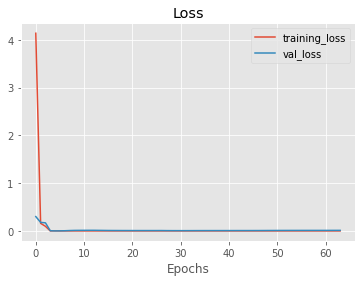

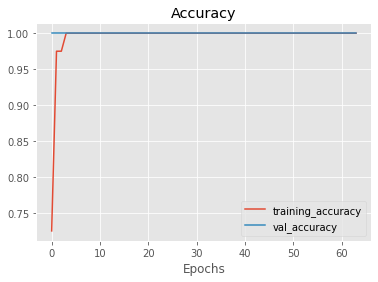

In [5]:
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.optimizers import Adam

#from tensorflow
plt.style.use('ggplot')

augment=ImageDataGenerator(rotation_range=10, fill_mode='nearest')
f_vectors=[]
all_labels=[]
for add in glob.glob ('C:\\Users\\Asus\\Desktop\\Dore\\covid dataset\\dataset\\*\\*'):
    img=cv2.imread(add)
    img=cv2.resize(img,(224,224))
    f_vectors.append(img)
    
    label=add.split('\\')[7]
    all_labels.append(label)
    
l_e=LabelEncoder()
int_encoding=l_e.fit_transform(all_labels)
one_hot_encoding=to_categorical(int_encoding,2)
f_vectors=np.array(f_vectors)
X_train,X_test,y_train, y_test=train_test_split(f_vectors, one_hot_encoding, test_size=0.2, random_state=42)
modelBase=VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))
modelBase.trainable=True
for layer in modelBase.layers[:-5]:
    layer.trainable=False
net=models.Sequential([modelBase,
                     layers.MaxPooling2D(4,4),
                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(2,activation='softmax')])
net.summary()
net.compile(Adam(lr=0.0001),
           loss='binary_crossentropy',
           metrics=['accuracy'])
history=net.fit(augment.flow(X_train, y_train, batch_size=8),steps_per_epoch=len(X_train)//8,
              validation_data=(X_test, y_test),epochs=64)
loss, acc=net.evaluate(X_test,y_test)
print(loss, acc)
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history)